# FLIGHT PRICE PREDICTION

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#LOADING DATASET
flt = pd.read_excel("FlightPrice_Prediction.xlsx")
flt

,Unnamed: 0,Airline Name,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,0,Go First,New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,"5,954"
1,1,Go First,New Delhi,Mumbai,14:20,16:35,2h 15m,Non Stop,"5,954"
2,2,Go First,New Delhi,Mumbai,19:40,21:55,2h 15m,Non Stop,"5,954"
3,3,Go First,New Delhi,Mumbai,21:00,23:15,2h 15m,Non Stop,"5,954"
4,4,Go First,New Delhi,Mumbai,16:45,21:25,4h 40m,1 Stop,"5,954"
...,...,...,...,...,...,...,...,...,...
1707,1707,Vistara,New Delhi,Chandigarh,07:30,18:30,35h 00m,2 Stop,16756
1708,1708,Vistara,New Delhi,Chandigarh,06:30,18:30,36h 00m,2 Stop,16756
1709,1709,Vistara,New Delhi,Chandigarh,07:30,08:20,24h 50m,2 Stop,17471
1710,1710,Vistara,New Delhi,Chandigarh,07:30,08:20,24h 50m,2 Stop,17471


# EDA-EXPLORATORY DATA ANALYSIS

In [3]:
# Checking the shape of the dataset
print("There are {} rows and {} columns in our dataframe".format(flt.shape[0], flt.shape[1]))

There are 1712 rows and 9 columns in our dataframe


In [4]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",flt.columns)

Columns present in our dataset:
 Index(['Unnamed: 0', 'Airline Name', 'Source', 'Destination', 'Departure Time',
       'Arrival Time', 'Duration', 'Total Stops', 'Price'],
      dtype='object')


Here, Price is the target column while remaining columns are feature columns. "Price" which stores the price of the flight tickets and it is continuous in nature which makes this problem to be a "Regression Problem".

In [5]:
# Checking number of unique values in each column of dataset
flt.nunique().to_frame("No of Unique Values")

,No of Unique Values
Unnamed: 0,1712
Airline Name,14
Source,9
Destination,11
Departure Time,209
Arrival Time,231
Duration,635
Total Stops,40
Price,426


In [6]:
# To get good overview of the dataset
flt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1712 non-null   int64 
 1   Airline Name    1712 non-null   object
 2   Source          1712 non-null   object
 3   Destination     1712 non-null   object
 4   Departure Time  1712 non-null   object
 5   Arrival Time    1712 non-null   object
 6   Duration        1712 non-null   object
 7   Total Stops     1712 non-null   object
 8   Price           1712 non-null   object
dtypes: int64(1), object(8)
memory usage: 120.5+ KB


This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.
The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
Since counts of all the columns are same, which means there are no null values present in the dataset.

In [7]:
# Checking null values in the dataset
flt.isnull().sum()

Unnamed: 0        0
Airline Name      0
Source            0
Destination       0
Departure Time    0
Arrival Time      0
Duration          0
Total Stops       0
Price             0
dtype: int64

As we can see there are no missing values in any of the columns.

In [8]:
# Checking the value counts of each columns
for i in flt.columns:
        print(flt[i].value_counts())
        print('*'*50)

0       1
1150    1
1148    1
1147    1
1146    1
       ..
567     1
566     1
565     1
564     1
1711    1
Name: Unnamed: 0, Length: 1712, dtype: int64
**************************************************
Air India           585
Vistara             468
IndiGo              187
Go Air              173
Go First            119
Indigo Air           90
SpiceJet             29
Air Asia             23
Spicejet             15
Spice Jet            11
AirAsia               8
IndiGo, AirAsia       2
Vistara, AirAsia      1
True Jet              1
Name: Airline Name, dtype: int64
**************************************************
New Delhi         583
Mumbai            359
Ahmedabad         195
Kolkata           154
Hyderabad         135
Chennai            94
Bangalore          84
Cochin (Kochi)     61
Bengaluru          47
Name: Source, dtype: int64
**************************************************
Mumbai            429
Bangalore         303
New Delhi         249
Goa               186
Pune      

In [9]:
#Replacing the entries in 'Airline Name' column
flt['Airline Name'] = flt['Airline Name'].replace('Air Asia', 'AirAsia')
flt['Airline Name'] = flt['Airline Name'].replace('Spice Jet', 'SpiceJet')
flt['Airline Name'] = flt['Airline Name'].replace('Spicejet', 'SpiceJet')
flt['Airline Name'] = flt['Airline Name'].replace('IndiGo, AirAsia', 'IndiGo')
flt['Airline Name'] = flt['Airline Name'].replace('Vistara, AirAsia', 'Vistara')
flt['Airline Name'] = flt['Airline Name'].replace('Indigo Air', 'IndiGo')
flt['Airline Name'] = flt['Airline Name'].replace('Indigo', 'IndiGo')

In [10]:
#Replacing the entries in 'Source' column
flt['Source'] = flt['Source'].replace('Bangalore','Bengaluru')
flt['Source'] = flt['Source'].replace('Cochin (Kochi)','Kochi')

In [11]:
#Replacing the entries in 'Destination' Column
flt['Destination'] = flt['Destination'].replace('Bangalore','Bengaluru')
flt['Destination'] = flt['Destination'].replace('Cochin (Kochi)','kochi')

In [12]:
flt['Arrival Time'] = flt['Arrival Time'].replace('00:10\n+ 2 days', '22:10')
flt['Arrival Time'] = flt['Arrival Time'].replace('01:50\n+ 2 days', '22:50')

In [13]:
# Converting columns from object type to Datetime Type
flt["Departure Time"] = pd.to_datetime(flt["Departure Time"])
flt["Arrival Time"] = pd.to_datetime(flt["Arrival Time"])

In [14]:
#Extracting Duration column using Time_of_arrival and Departure_Time
Difference = (flt["Arrival Time"]-flt["Departure Time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
flt["Duration"] = Diff_list

In [15]:
# Extracting Hours from Departure_time column
flt["Departure Hour"] = pd.to_datetime(flt["Departure Time"]).dt.hour

# Extracting Minutes from Dep_Time column
flt["Departure Min"] = pd.to_datetime(flt["Departure Time"]).dt.minute

In [16]:
# Extracting hour from Time_of_arrival column
flt["Arrival Hour"] = pd.to_datetime(flt["Arrival Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
flt["Arrival Min"] = pd.to_datetime(flt["Arrival Time"]).dt.minute

In [17]:
#Replacing the entries in 'Total Stops' column
flt['Total Stops'] = flt['Total Stops'].replace('2 Stop(s)','2 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('3 Stop(s)','3 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('4 Stop(s)','4 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Pune','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('2 stop via Guwahati,Chennai','2 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('Non stop','Non Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Mumbai','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Patna','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Ranchi','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Ahmedabad','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Lucknow','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Hyderabad','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Vadodara','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Goa','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Chennai','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Bengaluru','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Amritsar','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Srinagar','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('2 stop via Amritsar,Srinagar','2 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('3 stop via Leh,Jammu,Srinagar','3 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Varanasi','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('2 stop via Srinagar,Chandigarh','2 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Jabalpur','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Udaipur','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Jodhpur','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Indore','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Aurangabad','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Jaipur','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Chandigarh','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via New Delhi','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Kolkata','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Bhopal','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('2 stop via Goa,Bengaluru','2 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Raipur','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('2 stop via Ahmedabad,Nasik','2 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('1 stop via Kochi','1 Stop')
flt['Total Stops'] = flt['Total Stops'].replace('2 Stop','2 Stops')
flt['Total Stops'] = flt['Total Stops'].replace('3 Stop','3 Stops')

In [18]:
# Let's replace "," sign by empty space
flt['Price'][0:720] = flt['Price'][0:720].str.replace(',','')

# Let's convert data type of Price column to float
flt['Price'] = flt['Price'].astype('float')

In [19]:
flt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      1712 non-null   int64         
 1   Airline Name    1712 non-null   object        
 2   Source          1712 non-null   object        
 3   Destination     1712 non-null   object        
 4   Departure Time  1712 non-null   datetime64[ns]
 5   Arrival Time    1712 non-null   datetime64[ns]
 6   Duration        1712 non-null   float64       
 7   Total Stops     1712 non-null   object        
 8   Price           1712 non-null   float64       
 9   Departure Hour  1712 non-null   int64         
 10  Departure Min   1712 non-null   int64         
 11  Arrival Hour    1712 non-null   int64         
 12  Arrival Min     1712 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(4)
memory usage: 174.0+ KB


# Data Cleaning

In [20]:
# Dropping unnecessary columns
flt.drop("Unnamed: 0", axis=1, inplace=True)

# Dropping Arrival Time column
flt.drop("Arrival Time",axis=1,inplace=True)

# Dropping Departure Time column
flt.drop("Departure Time",axis=1,inplace=True)

In [21]:
flt

,Airline Name,Source,Destination,Duration,Total Stops,Price,Departure Hour,Departure Min,Arrival Hour,Arrival Min
0,Go First,New Delhi,Mumbai,2.166667,Non Stop,5954.0,8,0,10,10
1,Go First,New Delhi,Mumbai,2.250000,Non Stop,5954.0,14,20,16,35
2,Go First,New Delhi,Mumbai,2.250000,Non Stop,5954.0,19,40,21,55
3,Go First,New Delhi,Mumbai,2.250000,Non Stop,5954.0,21,0,23,15
4,Go First,New Delhi,Mumbai,4.666667,1 Stop,5954.0,16,45,21,25
...,...,...,...,...,...,...,...,...,...,...
1707,Vistara,New Delhi,Chandigarh,11.000000,2 Stops,16756.0,7,30,18,30
1708,Vistara,New Delhi,Chandigarh,12.000000,2 Stops,16756.0,6,30,18,30
1709,Vistara,New Delhi,Chandigarh,0.833333,2 Stops,17471.0,7,30,8,20
1710,Vistara,New Delhi,Chandigarh,0.833333,2 Stops,17471.0,7,30,8,20


In [22]:
#checking the shape of the dataframe after cleaning 
print("There are {} rows and {} columns in our dataframe after data cleaning".format(flt.shape[0], flt.shape[1]))

There are 1712 rows and 10 columns in our dataframe after data cleaning


# Visualization

# Airline Name

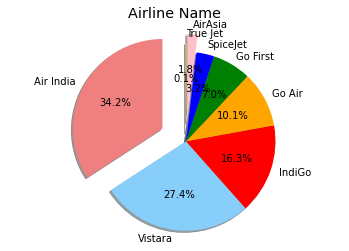

<Figure size 2160x2160 with 0 Axes>

In [23]:
#  pie plot of Flight_name 

labels = ['Air India', 'Vistara', 'IndiGo', 'Go Air', 'Go First','SpiceJet','AirAsia','True Jet']
value = [585, 469, 279, 173, 119, 55,31,1]
colors = ['lightcoral','lightskyblue', 'red','orange','green', 'blue','pink','yellow']
explode = [0.3,0,0,0,0,0,0.2,0.1] 

plt.style.use('ggplot')
plt.title('Airline Name')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(30,30))
plt.show()


<AxesSubplot:xlabel='Price', ylabel='Airline Name'>

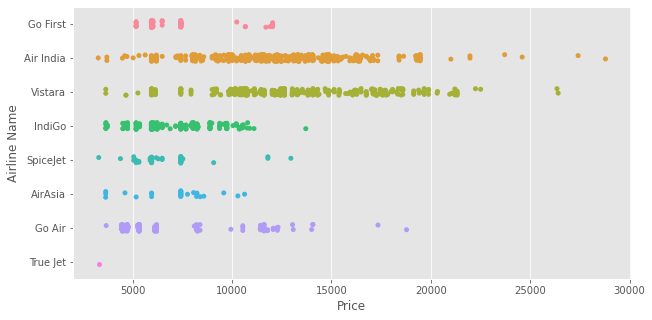

In [24]:
plt.figure(figsize=(10,5))
sns.stripplot(flt['Price'],flt['Airline Name'])

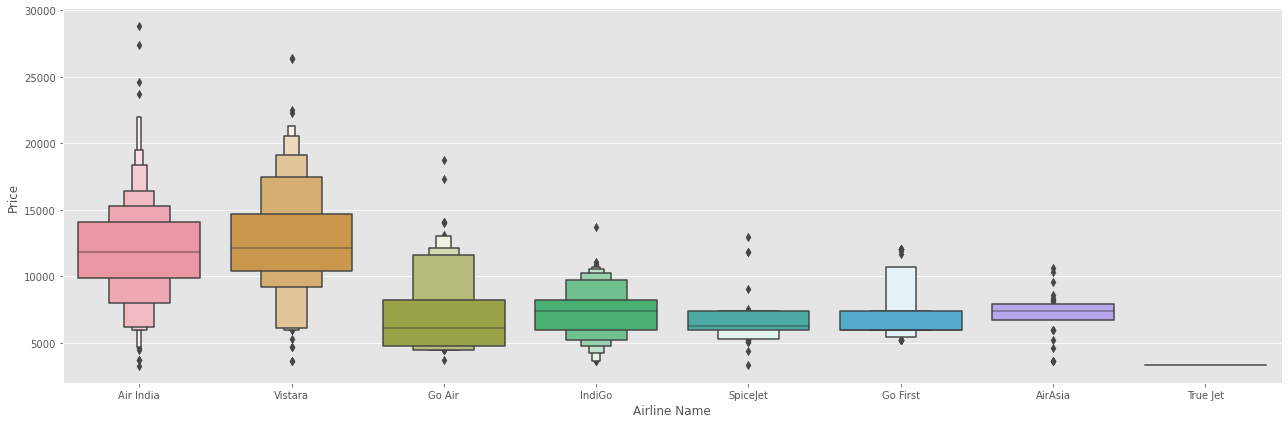

In [25]:
# Flight_name vs Price
sns.catplot(y = "Price", x = "Airline Name", data = flt.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


From the above plots and charts we can see that Air India flight prices are more higher than others in this dataset.

# Source

In [26]:
flt["Source"].value_counts()

New Delhi    583
Mumbai       359
Ahmedabad    195
Kolkata      154
Hyderabad    135
Bengaluru    131
Chennai       94
Kochi         61
Name: Source, dtype: int64

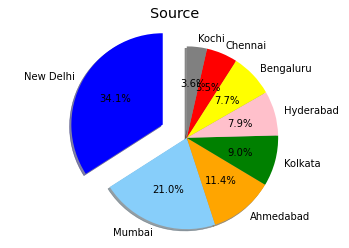

<Figure size 1080x720 with 0 Axes>

In [27]:
#  pie plot for Source

labels = ['New Delhi', 'Mumbai', 'Ahmedabad', 'Kolkata', 'Hyderabad', 'Bengaluru', 'Chennai', 'Kochi']
value = [583, 359, 195, 154, 135, 131, 94, 61]
colors = ['blue','lightskyblue','orange','green','pink','yellow','red','gray']
explode = [0.3,0,0,0,0,0,0,0] 

plt.style.use('ggplot')
plt.title('Source')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Source'>

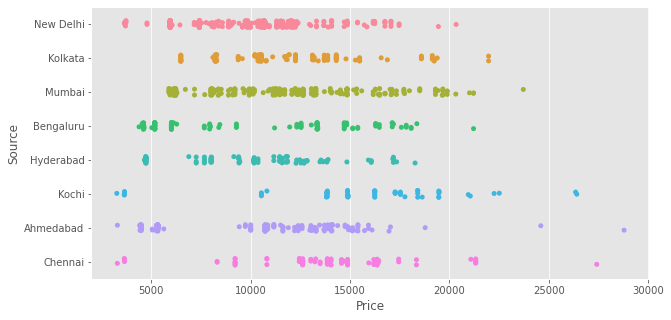

In [28]:
plt.figure(figsize=(10,5))
sns.stripplot(flt['Price'],flt['Source'])

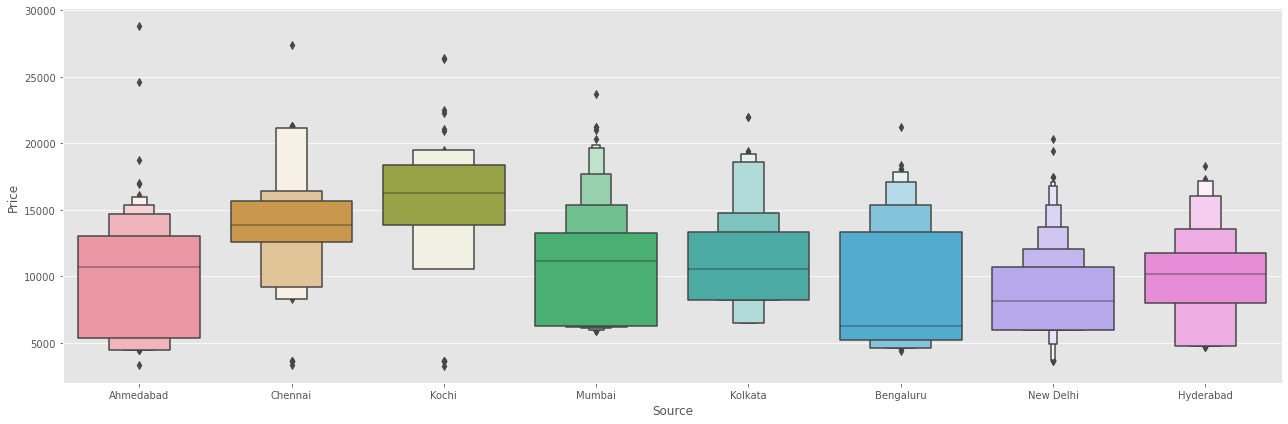

In [29]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = flt.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


From the above plots and charts we can see that Mumbai flight prices are more higher than others in this dataset.

# Destination

In [30]:
flt["Destination"].value_counts()

Mumbai        429
Bengaluru     348
New Delhi     249
Goa           186
Pune          145
kochi          95
Chennai        93
Chandigarh     74
Hyderabad      71
Ahmedabad      22
Name: Destination, dtype: int64

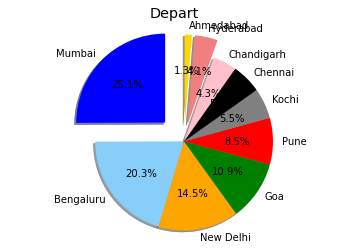

<Figure size 1080x720 with 0 Axes>

In [31]:
#  pie plot of Destination 

labels = ['Mumbai', 'Bengaluru', 'New Delhi', 'Goa', 'Pune', 'Kochi', 'Chennai', 'Chandigarh', 'Hyderabad', 'Ahmedabad']
value = [429, 348, 249, 186, 145, 95, 93, 74, 71, 22]
colors = ['blue','lightskyblue','orange','green','red','gray','black','pink','lightcoral','gold']
explode = [0.3,0,0,0,0,0,0,0,0.2,0.2]

plt.style.use('ggplot')
plt.title('Depart')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Destination'>

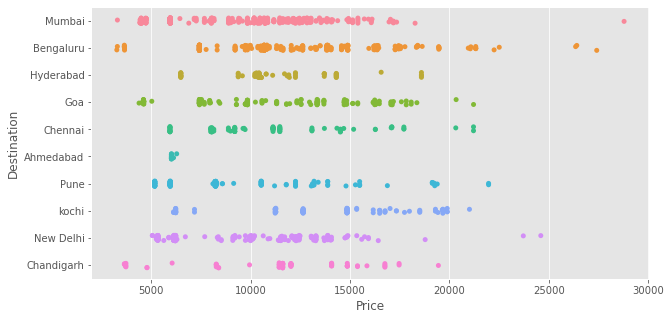

In [32]:
plt.figure(figsize=(10,5))
sns.stripplot(flt['Price'],flt['Destination'])

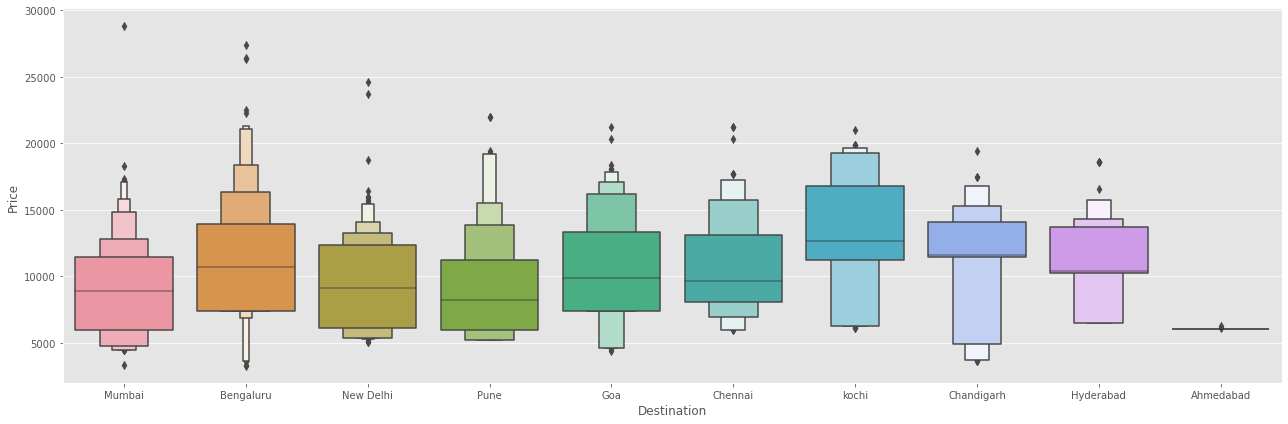

In [33]:
sns.catplot(y = "Price", x = "Destination", data = flt.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


From the above plots and charts we can see that Bengaluru flight prices are more higher  than others in this dataset.

# Total Stops

In [34]:
flt["Total Stops"].value_counts()

1 Stop      983
2 Stops     431
Non Stop    283
3 Stops      14
4 Stops       1
Name: Total Stops, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Total Stops'>

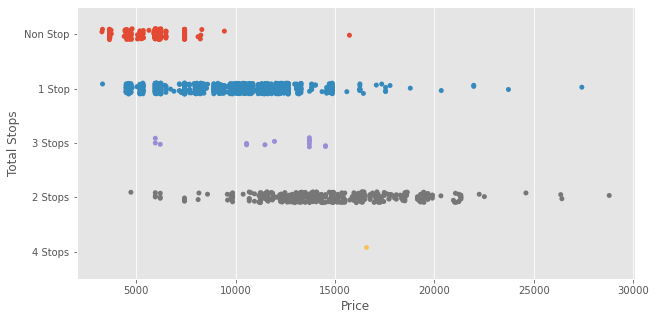

In [35]:
plt.figure(figsize=(10,5))
sns.stripplot(flt['Price'],flt['Total Stops'])

<AxesSubplot:xlabel='Total Stops', ylabel='Price'>

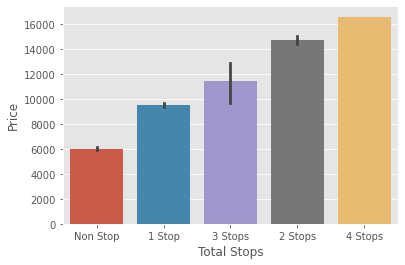

In [36]:
sns.barplot(flt['Total Stops'],flt['Price'])

Basically in this dataset mainly it shows from charts & plots that 1 stop flights are basically used.

# Distribution Plot

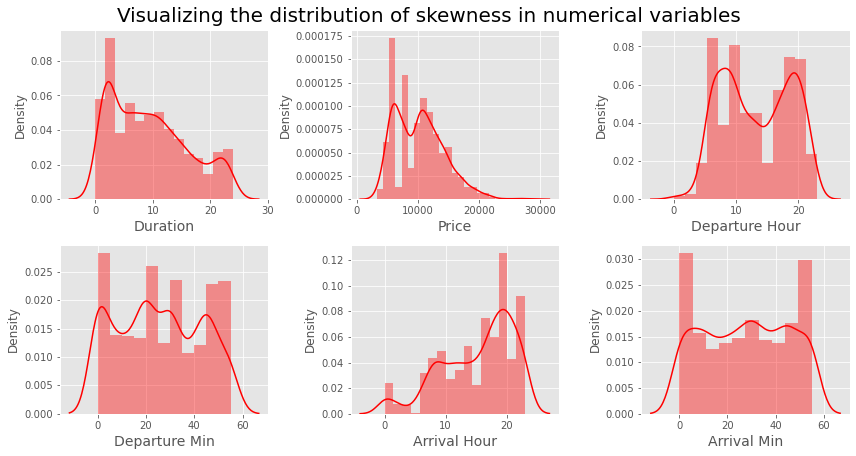

In [37]:
# Checking how the data has been distriubted in each column

col = ['Duration','Price', 'Departure Hour','Departure Min','Arrival Hour','Arrival Min']
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for i in col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(flt[i], color="red")
        plt.xlabel(i,fontsize=14)
    plotnumber+=1
plt.tight_layout()


From the above plots we can see that there are skewness in the dataset.

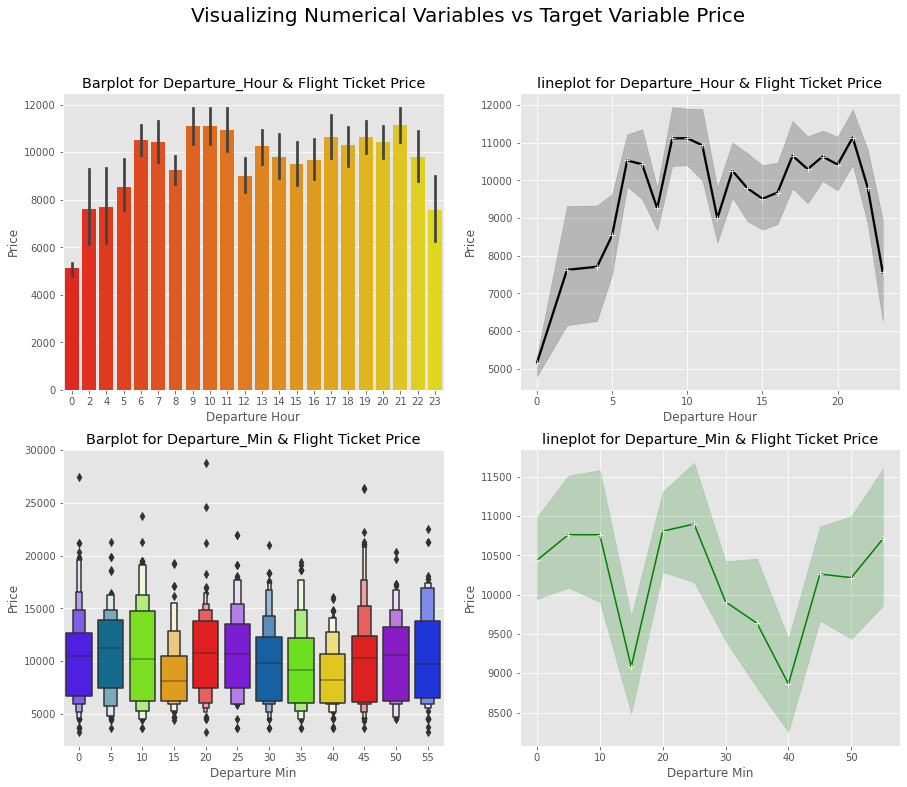

In [38]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Departure_Hour & Flight Ticket Price")
sns.barplot(x= flt['Departure Hour'], y= flt['Price'], data=flt, palette = "autumn", linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Departure_Hour & Flight Ticket Price")
sns.lineplot(x = flt['Departure Hour'], y= flt['Price'], marker="+", color='k', linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Departure_Min & Flight Ticket Price")
sns.boxenplot(x='Departure Min', y='Price', data=flt, palette = "prism", color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Departure_Min & Flight Ticket Price")
sns.lineplot(x='Departure Min', y='Price', data=flt, marker="+", color='g')

plt.show()

Departure Hour vs Price: From the bar plot and line plot we can see that there are some flights departing in the early morning having most expensive ticket prices compared to late morning flights. We can also observe the flight ticket prices are higher during afternoon (may fluctuate) and it decreases in the evening.

Departure Min vs Price: The boxen plot and line plot gives there is no significant difference between price and departure min.

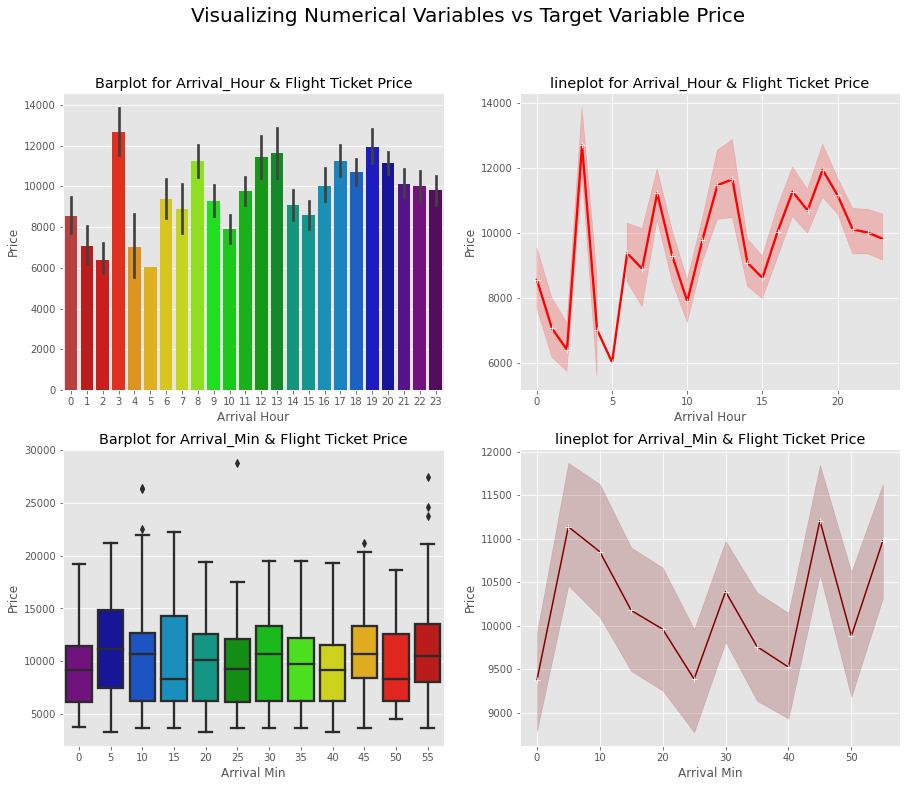

In [39]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Arrival_Hour & Flight Ticket Price")
sns.barplot(x= flt['Arrival Hour'], y= flt['Price'], data=flt, palette = "nipy_spectral_r", linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Arrival_Hour & Flight Ticket Price")
sns.lineplot(x = flt['Arrival Hour'], y= flt['Price'], marker="+", color='r', linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Arrival_Min & Flight Ticket Price")
sns.boxplot(x='Arrival Min', y='Price', data=flt, palette = "nipy_spectral", linewidth=2.3)

plt.subplot(2,2,4)
plt.title("lineplot for Arrival_Min & Flight Ticket Price")
sns.lineplot(x='Arrival Min', y='Price', data=flt, marker="+", color='maroon')

plt.show()


Arrival Hour vs Price: From the bar plot and line plot we can observe that very few flights are arriving in the early morning that is 0 to 5 AM they have very less ticket price. Also, the flights which are arriving in the afternoon and evening have somewhat higher price. So, we can conlude this column has some positive correlation with price.

Arrival Min vs Price: There is no significant difference between this feature and price. We can say flight ticket prices are not much dependent on the Arrival_min.

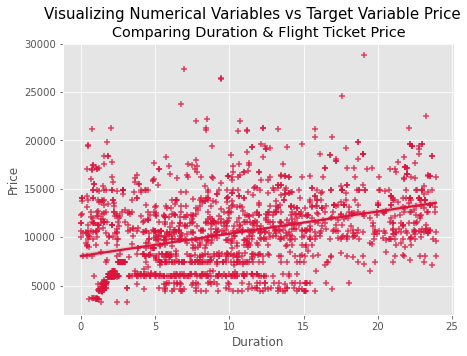

In [40]:
# Visualizing duration and price
plt.figure(figsize = (7,5))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=15)

plt.title("Comparing Duration & Flight Ticket Price")
sns.regplot(x= flt['Duration'],y= flt['Price'], marker="+", color='crimson')
plt.show()


From the reg plot we can observe some positive linear relation between Duration and Price. Flights having 1-15 hours of duration, they have ticket price of around 15000.

# Visualizing Categorical Variables vs Target Variable Price

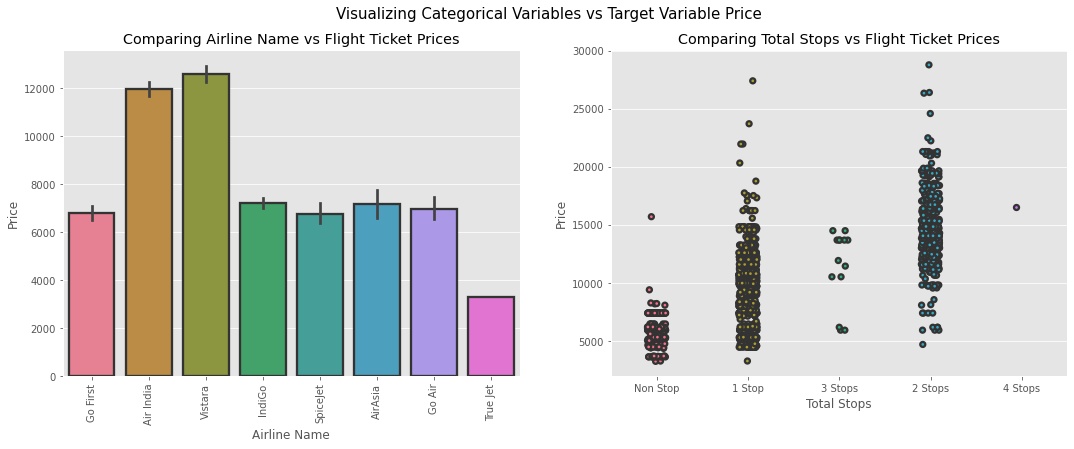

In [41]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price",fontsize=15)

# Checking which Airline is expensive based on Price of tickets
plt.subplot(1,2,1)
plt.title("Comparing Airline Name vs Flight Ticket Prices")
sns.barplot(x= flt['Airline Name'],y= flt['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)

# Checking flights which have meals availability are expensive or not?
plt.subplot(1,2,2)
plt.title("Comparing Total Stops vs Flight Ticket Prices")
sns.stripplot(x = flt['Total Stops'],y= flt['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

Airline vs Price: From the bar plot we can notice "Vistara" and "Air India" airlines have highest ticket prices compared to other airlines.

Total Stops vs Price: From the strip plot we can notice the flights which have 1 and 2 stops between source and destination have highest ticket price.

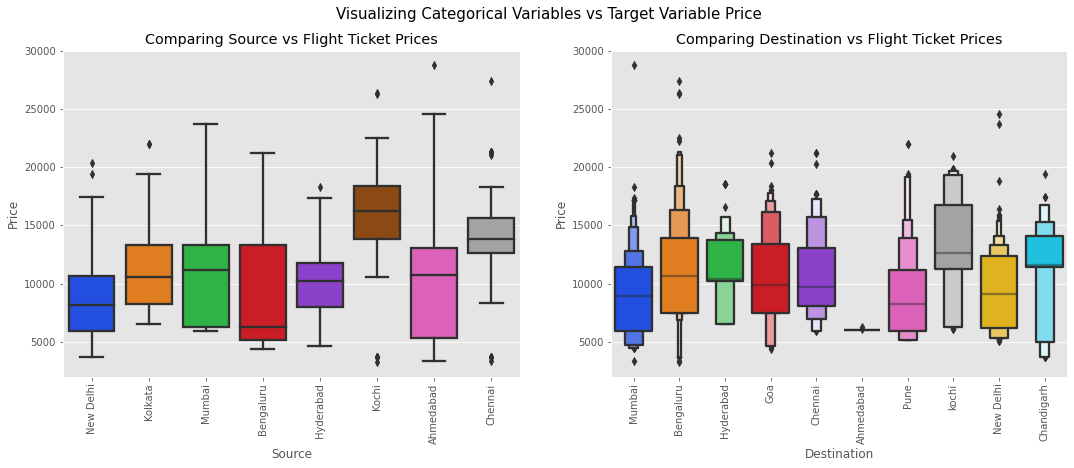

In [42]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# Checking which source has highest ticket price
plt.subplot(1,2,1)
plt.title("Comparing Source vs Flight Ticket Prices")
sns.boxplot(x= flt['Source'],y= flt['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)

# Checking how prices changes in each destination 
plt.subplot(1,2,2)
plt.title("Comparing Destination vs Flight Ticket Prices")
sns.boxenplot(x = flt['Destination'],y= flt['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)
plt.show()

Source vs Price: From the box plot we can observe the flights from Ahmedabad is having higher price compared to other sources.
    
Destination vs Price: From the boxen plot we can notice that the flights travelling to Bengaluru have higher flight ticket prices.

# Visualizing relation between two independent variables.

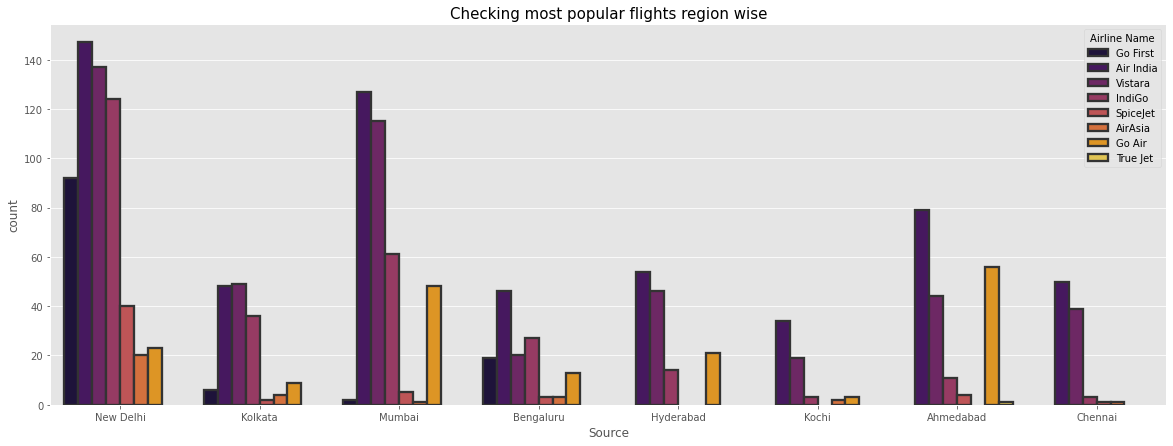

In [43]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline Name", data = flt, palette = "inferno",linewidth=2.3, edgecolor=".2")
plt.title("Checking most popular flights region wise",fontsize=15)
plt.show()

The plot showing the region wise count of airlines shows that New Delhi, Kolkata, Mumbai and Bengaluru Source is not having True jet flight, Hyderabad source is not having Go First, SpiceJet,AirAsia and True Jet flights, Kochi is not having Go First,SpiceJet and True jet flights, Ahmedabad is not having Go FirstAirAsia flights, Chennai is not having Go First,Go Air and True jet flights. Air India flights are in higher count in almost all the regions except Kolkata. Kolkata has Vistara flights in higher count. 

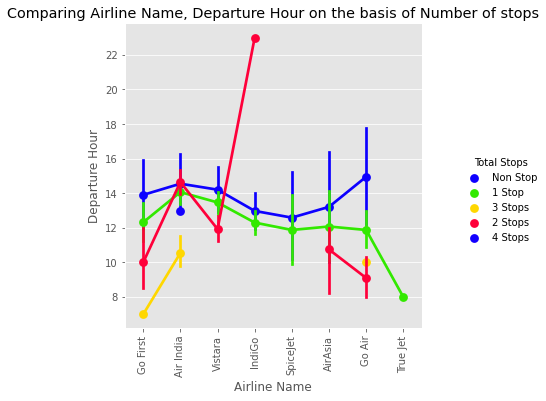

In [44]:
sns.factorplot(x= "Airline Name", y="Departure Hour",hue="Total Stops",palette="prism", data=flt)
plt.title("Comparing Airline Name, Departure Hour on the basis of Number of stops")
plt.xticks(rotation = 90)
plt.show()

Above plot gives the relation between Airline and Departure hour based on Number of stops. Flights departing in the evening have more stops during the journey.

# Data Analysis

After cleaning the data, we have done the following analyis:

1.Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?

Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts. Some flights are departing in the early morning having most expensive ticket prices compared to late morning flights. As the time goes the flight ticket fares increased and midnight flight fares are very less (say after 10 PM). Also from categorical and numerical plots we found that the prices are tending to go up as the time is approaching from morning to evening.

2.What is the best time to buy so that the consumer can save the most by taking the least risk?

From the categorical plots (bar and box) we came to know that early morning and late night flights are cheaper compared to working hours.

3.Does price increase as we get near to departure date?

From the categorical plots we found that the flight ticket prices increases as the person get near to departure time. That is last minute flights are very expensive.

4.Is Indigo cheaper than Jet Airways? 

From the bar plot we got to know that both Indigo is bit expensive than SpiceJet airways.

5.Are morning flights expensive?

Not all flights are expensive during morning, only few flights departing in the early morning are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.

# Data Pre-Processing

# Label Encoding:

In [45]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

flt['Airline Name']=le.fit_transform(flt['Airline Name'])
flt['Source']=le.fit_transform(flt['Source'])
flt['Destination']=le.fit_transform(flt['Destination'])
flt['Total Stops']=le.fit_transform(flt['Total Stops'])

In [46]:
#Displaying dataframe after encoding
flt

,Airline Name,Source,Destination,Duration,Total Stops,Price,Departure Hour,Departure Min,Arrival Hour,Arrival Min
0,3,7,6,2.166667,4,5954.0,8,0,10,10
1,3,7,6,2.250000,4,5954.0,14,20,16,35
2,3,7,6,2.250000,4,5954.0,19,40,21,55
3,3,7,6,2.250000,4,5954.0,21,0,23,15
4,3,7,6,4.666667,0,5954.0,16,45,21,25
...,...,...,...,...,...,...,...,...,...,...
1707,7,7,2,11.000000,1,16756.0,7,30,18,30
1708,7,7,2,12.000000,1,16756.0,6,30,18,30
1709,7,7,2,0.833333,1,17471.0,7,30,8,20
1710,7,7,2,0.833333,1,17471.0,7,30,8,20


# Correlation:

In [47]:
flt.corr()

,Airline Name,Source,Destination,Duration,Total Stops,Price,Departure Hour,Departure Min,Arrival Hour,Arrival Min
Airline Name,1.000000,0.108276,-0.035208,-0.023442,0.007826,0.046516,-0.086699,0.258751,0.022892,0.113442
Source,0.108276,1.000000,-0.088176,-0.174369,0.062689,-0.093736,-0.072718,0.021901,-0.028555,0.082325
Destination,-0.035208,-0.088176,1.000000,-0.015502,0.011056,-0.114361,0.011200,-0.066506,-0.074628,-0.118749
Duration,-0.023442,-0.174369,-0.015502,1.000000,-0.438864,0.378192,0.111967,-0.015872,-0.064104,0.029002
Total Stops,0.007826,0.062689,0.011056,-0.438864,1.000000,-0.285943,0.040702,-0.019096,-0.014720,-0.056292
Price,0.046516,-0.093736,-0.114361,0.378192,-0.285943,1.000000,0.041430,-0.035322,0.121863,0.029339
Departure Hour,-0.086699,-0.072718,0.011200,0.111967,0.040702,0.041430,1.000000,-0.080206,-0.021422,0.000623
Departure Min,0.258751,0.021901,-0.066506,-0.015872,-0.019096,-0.035322,-0.080206,1.000000,0.005331,0.023138
Arrival Hour,0.022892,-0.028555,-0.074628,-0.064104,-0.014720,0.121863,-0.021422,0.005331,1.000000,0.002893
Arrival Min,0.113442,0.082325,-0.118749,0.029002,-0.056292,0.029339,0.000623,0.023138,0.002893,1.000000


Correlation using heatmap:

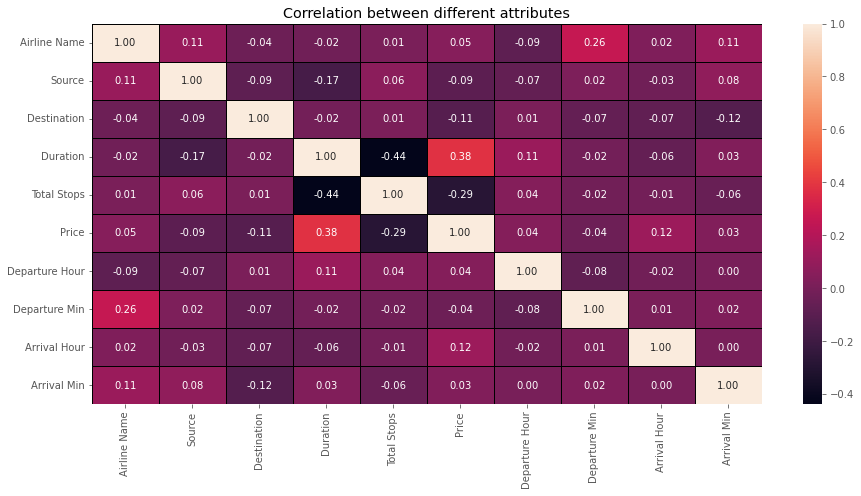

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(flt.corr(),annot=True,linewidth=1,linecolor='black',fmt='.2f')
plt.title("Correlation between different attributes")
plt.show()

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature with another.

This heat map contains both positive and negative correlation.

The columns Total Stops and Duration are highly correlated with the target column compared to other column.

The other features have very less correlation with the target column.

From the map we can also observe there is no multicollinearity issue exists.

# Visualizing the correlation between label and features using bar plot

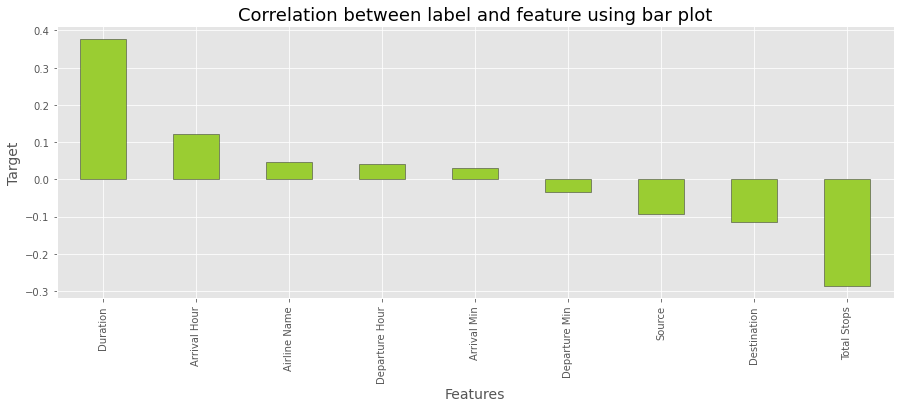

In [49]:
plt.figure(figsize=(15,5))
flt.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='yellowgreen',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()


From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "Arrival Min" has less correlation with the label compared to other features, we can drop this column if necessary but for now let's keep it as it is.

# Describe of the dataset

In [50]:
#statistical summary of the dataset

flt.describe()

,Airline Name,Source,Destination,Duration,Total Stops,Price,Departure Hour,Departure Min,Arrival Hour,Arrival Min
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,3.162383,4.657126,4.793224,9.504722,0.931075,10253.700935,13.225467,25.280374,15.231893,27.701519
std,2.811937,2.524889,2.594649,6.628345,1.438363,4026.836036,5.486766,17.276001,5.924764,17.477220
min,0.000000,0.000000,0.000000,0.000000,0.000000,3269.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,3.166667,0.000000,6406.000000,8.000000,10.000000,11.000000,10.000000
50%,3.000000,6.000000,6.000000,8.583333,0.000000,10178.000000,13.000000,25.000000,17.000000,30.000000
75%,7.000000,7.000000,7.000000,14.083333,1.000000,12642.000000,19.000000,40.000000,20.000000,45.000000
max,7.000000,7.000000,9.000000,23.916667,4.000000,28790.000000,23.000000,55.000000,23.000000,55.000000


Describe of dataset using heatmap:

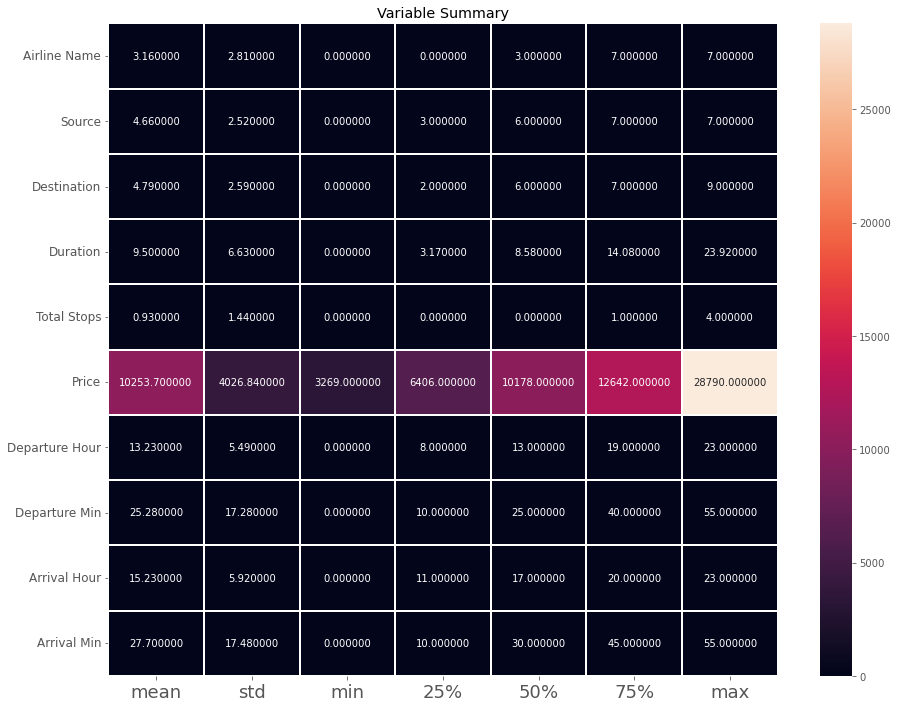

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(round(flt.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

Outcome of Describe of datasets:

# Removing Outliers:

# z-Score Technique:

In [52]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(flt))
z.shape

(1712, 10)

In [53]:
threshold=3
print(np.where(z>3))

(array([1152, 1346, 1347, 1348, 1465, 1543, 1637], dtype=int64), array([5, 5, 5, 5, 5, 5, 5], dtype=int64))


In [54]:
flt_new=flt[(z<3).all(axis=1)]
print(flt.shape)
print(flt_new.shape)

(1712, 10)
(1705, 10)


Percentage Data Loss

In [55]:
percentage_loss=(1712-1705)/1712*100
print(percentage_loss)

0.40887850467289716


# IQR Technique:

In [56]:
Q1 = flt.quantile(0.25)
Q3 = flt.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Airline Name         7.000000
Source               4.000000
Destination          5.000000
Duration            10.916667
Total Stops          1.000000
Price             6236.000000
Departure Hour      11.000000
Departure Min       30.000000
Arrival Hour         9.000000
Arrival Min         35.000000
dtype: float64


In [57]:
flt_new1= flt[~((flt < (Q1 - 1.5 * IQR)) |(flt > (Q3 + 1.5 * IQR))).any(axis=1)]
print(flt.shape)
print(flt_new1.shape)

(1712, 10)
(1420, 10)


Percentage Data Loss

In [58]:
percentage_loss=((1712-1420)/1712)*100
print(percentage_loss)

17.056074766355138


# The percentage loss in the z-score is less, so we prefer z-score over IQR.

# Dividing Data in features and vector:

In [59]:
x=flt_new.drop("Price", axis=1)
y=flt_new["Price"]

# Transforming data to remove skewness:

In [60]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.20312928,  0.98333193,  0.46200075, ..., -1.72660843,
        -0.9709272 , -0.94438635],
       [ 0.20312928,  0.98333193,  0.46200075, ..., -0.13098901,
         0.05243909,  0.48589372],
       [ 0.20312928,  0.98333193,  0.46200075, ...,  0.84989472,
         1.03203775,  1.4035563 ],
       ...,
       [ 1.20639047,  0.98333193, -1.08095978, ...,  0.38929583,
        -1.26806292, -0.31074786],
       [ 1.20639047,  0.98333193, -1.08095978, ...,  0.38929583,
        -1.26806292, -0.31074786],
       [ 1.20639047,  0.98333193, -1.08095978, ...,  1.06433854,
        -0.30872419,  0.48589372]])

# Feature Scaling Using StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.20312928,  0.98333193,  0.46200075, ..., -1.72660843,
        -0.9709272 , -0.94438635],
       [ 0.20312928,  0.98333193,  0.46200075, ..., -0.13098901,
         0.05243909,  0.48589372],
       [ 0.20312928,  0.98333193,  0.46200075, ...,  0.84989472,
         1.03203775,  1.4035563 ],
       ...,
       [ 1.20639047,  0.98333193, -1.08095978, ...,  0.38929583,
        -1.26806292, -0.31074786],
       [ 1.20639047,  0.98333193, -1.08095978, ...,  0.38929583,
        -1.26806292, -0.31074786],
       [ 1.20639047,  0.98333193, -1.08095978, ...,  1.06433854,
        -0.30872419,  0.48589372]])

# MODEL BUILDING:

Finding the Best Random State and Accuracy

# Linear Regression:

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

At random state: 186
Training r2_score is: -68922.32387283465
Testing r2_score is: -65949.27168778137
At random state: 251
Training r2_score is: -67767.22024215173
Testing r2_score is: -74022.75757827538
At random state: 585
Training r2_score is: -68125.18639823716
Testing r2_score is: -75390.21590498554
At random state: 594
Training r2_score is: -68136.05710272539
Testing r2_score is: -68051.0972631834
At random state: 631
Training r2_score is: -68737.01617359533
Testing r2_score is: -74130.76007029235
At random state: 898
Training r2_score is: -67840.93892157747
Testing r2_score is: -68744.98813790067
Error:
Mean Absolute Error: 2950.7229357869905
Mean Squared Error: 12657269.879221173
Root Mean Square Error: 3557.7057044141766


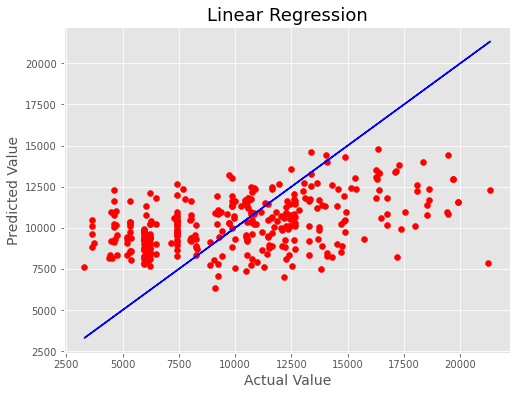

In [63]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state:",i)
        print("Training r2_score is:",r2_score(y_train,pred_train*100))
        print("Testing r2_score is:",r2_score(y_test,pred_test*100))
        
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=594)

# Regularization

# 1. Lasso:

In [65]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [66]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- -27.56906606329278
R2_score is :- 19.20716755028432


At cv:- 3
Cross validation score is:- -9.357706410906312
R2_score is :- 19.20716755028432


At cv:- 4
Cross validation score is:- -12.246549912542
R2_score is :- 19.20716755028432


At cv:- 5
Cross validation score is:- -1.8157999696723492
R2_score is :- 19.20716755028432


At cv:- 6
Cross validation score is:- -12.5859560349264
R2_score is :- 19.20716755028432


At cv:- 7
Cross validation score is:- -20.79235049361443
R2_score is :- 19.20716755028432


At cv:- 8
Cross validation score is:- -12.225672356993408
R2_score is :- 19.20716755028432


At cv:- 9
Cross validation score is:- -63.263275264532446
R2_score is :- 19.20716755028432




In [67]:
print("At cv:",4)
print("Cross validation score is:",-12.246549912542)
print("R2_Score is:",19.20716755028432)

At cv: 4
Cross validation score is: -12.246549912542
R2_Score is: 19.20716755028432


The value of cv is taken as 4

In [68]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 2852.2621240246417
Mean Squared Error: 12093119.711103348
Root Mean Square Error: 3477.516313563942


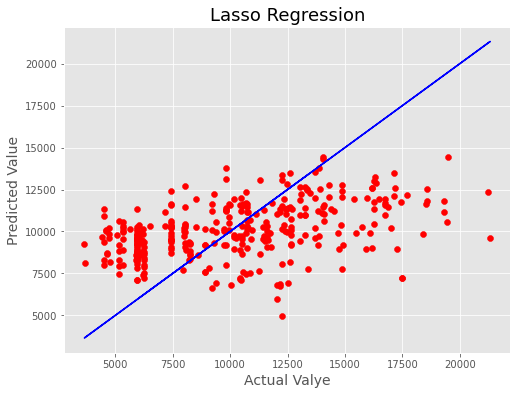

In [69]:
#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Valye',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge:

In [70]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


R2 Score: 19.14865937404404
Cross Val Score: -12.525023981868976
Error:
Mean Absolute Error: 2852.0803541780824
Mean Squared Error: 12101877.250081727
Root Mean Square Error: 3478.7752514472286


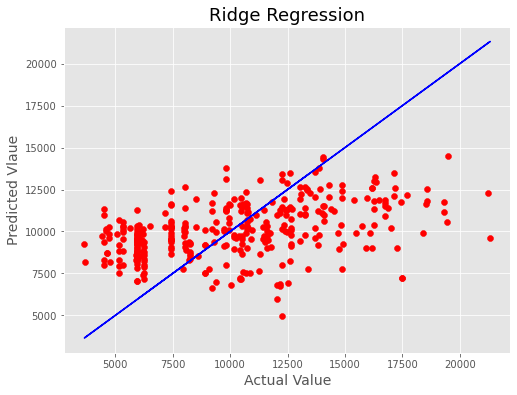

In [71]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=4)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


Created Ridge Regressor model and checked for its evaluation metrics. The model is giving R2 score as 19.14%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# Approaching more Regressors:

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# 1.Decision Tree Regressor:

R2 Score: 19.14865937404404
Cross Val Score: 21.128644911162077
Error:
Mean Absolute Error: 971.4985337243402
Mean Squared Error: 4731741.793255132
Root Mean Square Error: 2175.2567189311544


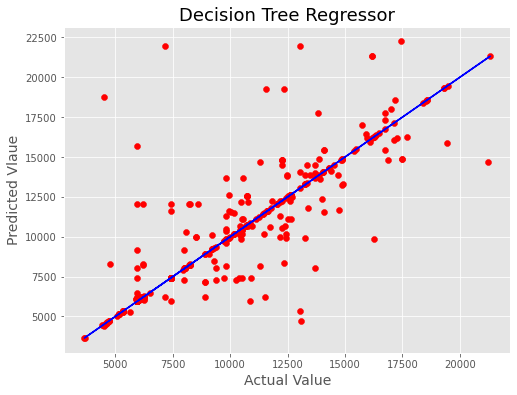

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse',splitter='best')
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr = dtr.predict(x_test)

dtr_r2 = r2_score(y_test,pred_rd)
print('R2 Score:',dtr_r2*100)

dtrscore = cross_val_score(dtr,x,y,cv=4)
dtrcc = dtrscore.mean() 
print('Cross Val Score:',dtrcc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_dtr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()


Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 19.14%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# 2. KNeighbors Regressor:

R2 Score: 69.31875965240464
Cross Val Score: 20.72445348968129
Error:
Mean Absolute Error: 1503.7149560117302
Mean Squared Error: 4592386.4921994135
Root Mean Square Error: 2142.985415769182


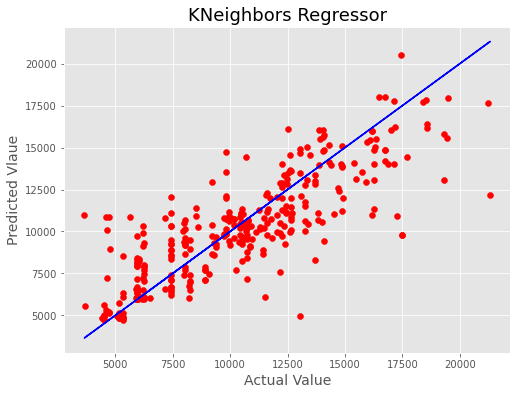

In [74]:
knr=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
pred_knr = knr.predict(x_test)

knr_r2 = r2_score(y_test,pred_knr)
print('R2 Score:',knr_r2*100)

knrscore = cross_val_score(knr,x,y,cv=4)
knrcc = knrscore.mean() 
print('Cross Val Score:',knrcc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_knr)))

#Visualizing the Predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_knr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

Created KNeighbors Regressor model and checked for its evaluation metrics. The model is giving R2 score as 69.31%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# 3.SVR:

R2 Score: 0.5658674814917442
Cross Val Score: -16.37907783898055
Error:
Mean Absolute Error: 3207.585903677629
Mean Squared Error: 14883360.707330497
Root Mean Square Error: 3857.895891199048


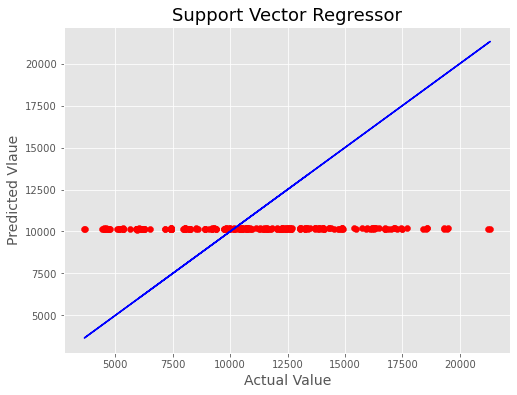

In [75]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_svr = svr.predict(x_test)

svr_r2 = r2_score(y_test,pred_svr)
print('R2 Score:',svr_r2*100)

svr_score = cross_val_score(svr,x,y,cv=4)
svr_cc = svr_score.mean() 
print('Cross Val Score:',svr_cc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_svr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Support Vector Regressor',fontsize=18)
plt.show()

Created Support Vector Regressor model and checked for its evaluation metrics. The model is giving R2 score as 0.5658%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# Ensemble Methods:

# 1.Random Forest Regressor:

R2 Score: 19.14865937404404
Cross Val Score: 56.332637721611
Error:
Mean Absolute Error: 806.7926585090537
Mean Squared Error: 2212514.0027945195
Root Mean Square Error: 1487.4521850447898


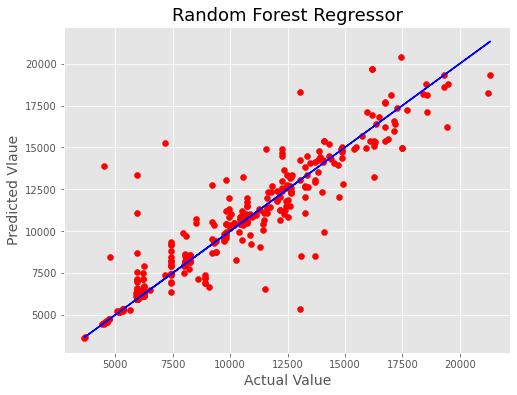

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,criterion='mse')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf = rf.predict(x_test)

rf_r2 = r2_score(y_test,pred_rd)
print('R2 Score:',rf_r2*100)

rf_score = cross_val_score(rf,x,y,cv=4)
rf_cc = rf_score.mean() 
print('Cross Val Score:',rf_cc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rf)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rf, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

Created Random Forest Regressor model and checked for its evaluation metrics. The model is giving R2 score as 19.14%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# 2.Ada Boost Regressor

R2 Score: 66.30040014666312
Cross Val Score: 40.99171297649316
Error:
Mean Absolute Error: 1813.37779450608
Mean Squared Error: 5044176.356811437
Root Mean Square Error: 2245.924388044138


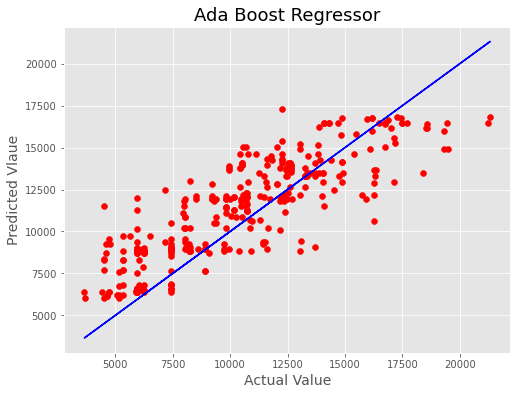

In [77]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50)
ada.fit(x_train,y_train)
ada.score(x_train,y_train)
pred_ada = ada.predict(x_test)

ada_r2 = r2_score(y_test,pred_ada)
print('R2 Score:',ada_r2*100)

ada_score = cross_val_score(ada,x,y,cv=4)
ada_cc = ada_score.mean() 
print('Cross Val Score:',ada_cc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ada))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ada)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ada, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Ada Boost Regressor',fontsize=18)
plt.show()

Created Ada Boost Regressor model and checked for its evaluation metrics. The model is giving R2 score as 66.30%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# 3.Gradient Boosting Regressor

R2 Score: 87.01257531305733
Cross Val Score: 56.836487303923164
Error:
Mean Absolute Error: 1023.6489600746621
Mean Squared Error: 1943965.531544988
Root Mean Square Error: 1394.2616438620794


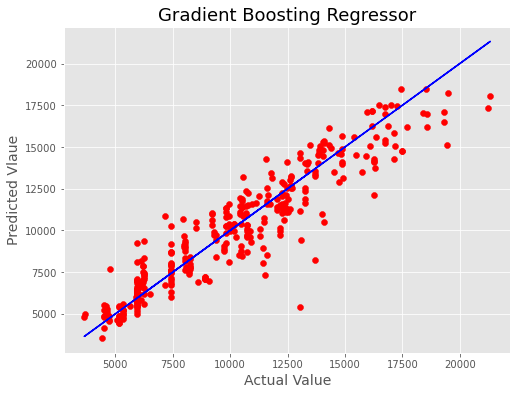

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(x_train, y_train)
gbr.score(x_train, y_train)
pred_gbr =gbr.predict(x_test)

gbrs= r2_score(y_test,pred_gbr)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=4)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gbr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gbr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_gbr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()

Created Gradient Boosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 87.01%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# 4. Extreme Gradient Boosting Regressor (XGB)

R2 Score: 85.62161127973611
Cross Val Score: 50.405563109772565
Error:
Mean Absolute Error: 900.8290414222874
Mean Squared Error: 2152165.86391063
Root Mean Square Error: 1467.0261974179705


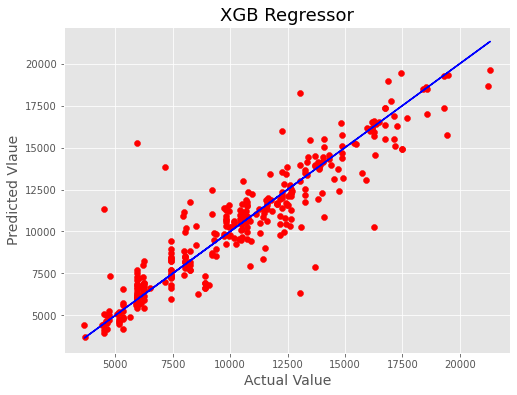

In [79]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb = xgb.predict(x_test)


xgbs= r2_score(y_test,pred_xgb)
print('R2 Score:',xgbs*100)

xgbscore = cross_val_score(xgb,x,y,cv=4)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_xgb, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('XGB Regressor',fontsize=18)
plt.show()

Created XGB Regressor model and checked for its evaluation metrics. The model is giving R2 score as 85.62%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# 5.SGD Regressor:

R2 Score: 19.106503605037084
Cross Val Score: -27.99802657557346
Error:
Mean Absolute Error: 2858.5354235662826
Mean Squared Error: 12108187.150918934
Root Mean Square Error: 3479.6820473886596


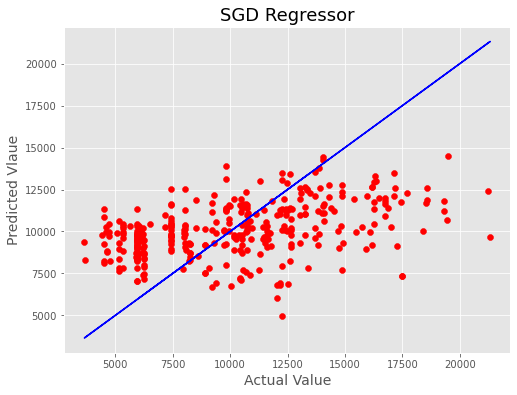

In [80]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
sgd.score(x_train,y_train)
pred_sgd = sgd.predict(x_test)

sgd_r2 = r2_score(y_test,pred_sgd)
print('R2 Score:',sgd_r2*100)

sgd_score = cross_val_score(sgd,x,y,cv=2)
sgd_cc = sgd_score.mean() 
print('Cross Val Score:',sgd_cc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sgd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sgd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_sgd)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_sgd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SGD Regressor',fontsize=18)
plt.show()

Created Stochastic Gradient Regressor model and checked for its evaluation metrics. The model is giving R2 score as 19.10%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

# Model Selection

From the above created models, Gradient Boosting algorithm has high R2 score and less RMSE value. So, we can conclude that "Gradient Boosting Regressor" as the best fitting model.

# Model Saving:

In [81]:
import pickle
filename = 'flight-price.pkl'
pickle.dump(gbr, open(filename, 'wb'))

# Creating DataFrame for the predicted values

In [82]:
import numpy as np
a=np.array(y_test)
a

array([13400., 11310., 13054., 11465., 12256., 12642.,  4493., 16760.,
        9840.,  4603.,  4610., 17016.,  9840., 10178., 10680.,  4744.,
        5954., 18594.,  7424.,  7177.,  8895.,  7423., 10534.,  5955.,
        9840.,  4437., 13707.,  8243.,  5955., 10728.,  6122.,  7424.,
       10680., 17184., 10680.,  7425.,  5942.,  8025., 11614.,  8025.,
        5955.,  7425.,  8043.,  8583.,  5955., 12541.,  6196., 13822.,
       12260., 13278.,  6229., 14068.,  4717.,  6489.,  5327.,  5955.,
       13082., 12260., 17273.,  6203., 15930., 21214., 16881., 14516.,
       15733., 14752., 13278., 10728.,  8243., 10004., 10534.,  5327.,
        9201.,  7425.,  5350.,  4493.,  6229.,  7425.,  7425.,  5327.,
       13713., 15485., 10728., 14380., 13714.,  6230., 21326.,  8895.,
        5954., 13897., 16756., 10728.,  5886.,  8043., 12642., 11436.,
        8272., 10425.,  3657.,  7424., 13346., 12642.,  5320.,  7424.,
        5177., 12150.,  8043., 19300., 17126.,  7425., 13035., 19300.,
      

In [85]:
predicted=np.array(gbr.predict(x_test))
predicted

array([14084.99820152,  9669.88781802, 11177.03320502, 10764.97153573,
       12216.92390998, 12680.69392664,  5501.54558692, 17380.26903403,
        9845.46784705,  5138.31020166,  5460.9832593 , 17513.26132115,
        9272.9969819 , 10334.71055929, 11061.34582325,  4619.26779545,
        5540.2560444 , 16999.73666262,  8725.2609972 , 10859.7189519 ,
        7089.38285127,  7970.07539277, 11867.70536862,  6213.46518079,
       10273.711794  ,  3554.50154537, 13291.23232576,  7976.39111887,
        5686.78553787,  9678.52922453,  5824.88847609,  7949.03258909,
       11463.70575371, 15031.88154748, 10919.42849243,  7464.84154724,
        6157.35525974,  8741.35872937, 11578.84493888,  8922.96330221,
        6158.80307856,  7601.08819466,  7632.86603767,  6935.46425287,
        6243.35795724, 11110.86006009,  7011.91520392, 14530.91984312,
       11372.10107918, 12528.79824021,  7307.10177641, 10530.02629407,
        4883.43618297,  6210.6279088 ,  4967.12298026,  9230.32211628,
      

In [86]:
flt_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
flt_com

,original,predicted
0,13400.0,14084.998202
1,11310.0,9669.887818
2,13054.0,11177.033205
3,11465.0,10764.971536
4,12256.0,12216.923910
...,...,...
336,5178.0,4878.666221
337,16245.0,12144.790769
338,11614.0,11739.636065
339,14864.0,14860.520718


# From the above table, the model is predicted with 87 percent accuracy.

# Conclusion:

The case study aims to give an idea of applying Machine Learning algorithms to predict the price of the flight tickets. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.

First we collected the flights data from websites like www.yatra.com, www.makemytrip.com,www.tripodeal.com and www.vimaansafar.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 1712 of data which contained the ticket price of the flights and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.

Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.

From the visualizations we have done some analysis which is mentioned  in the EDA conclusion part of this project. 